# Airline fares completely explained.With 96.% of our test data explain by our model using random forest.

# Importing libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import statsmodels.api as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 

In [44]:
train_df=pd.read_excel('C:/Users/student/airlitrain.xlsx',header=0)

In [45]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


# DATA MANIPULATION

In [46]:
 train_df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649


### FINDING MISSING VALUES

In [47]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional Info    0
Price              0
dtype: int64

In [48]:

train_df.dropna(subset = ["Route"], inplace=True)

In [49]:
train_df.isnull().sum().sum()

0

In [50]:
print(train_df['Total_Stops'].unique())
print(train_df['Airline'].unique())
print(train_df['Source'].unique())
print(train_df['Destination'].unique())

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


### DATA FORMATTING

#### Dropping all other factors that do not directly affect price of airline ticket

In [51]:
train_df = train_df.drop(['Dep_Time','Arrival_Time','Additional Info'], axis=1)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Price            10682 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 751.1+ KB


### Creating dummies

In [53]:
train_df["Airline"] = train_df["Airline"].astype('category')
train_df["Source"] = train_df["Source"].astype('category')
train_df["Destination"] = train_df["Destination"].astype('category')
train_df.dtypes
df=train_df

In [54]:
train_df["Airline_cat"] = train_df["Airline"].cat.codes
train_df["Source_cat"] = train_df["Source"].cat.codes
train_df["Destination_cat"] = train_df["Destination"].cat.codes


In [55]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Airline_cat,Source_cat,Destination_cat
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3898,3,0,5
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7663,1,3,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13883,4,2,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6219,3,3,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13303,3,0,5


In [56]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Airline_cat,Source_cat,Destination_cat
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3898,3,0,5
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7663,1,3,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13883,4,2,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6219,3,3,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13303,3,0,5


### clean up of number of total number of stops

In [57]:
cleanup_num={"Total_Stops" :{"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4,"DEL → BOM → COK":1}}
train_df = train_df.replace(cleanup_num)
train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Airline_cat,Source_cat,Destination_cat
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,2h 30m,0,4108,0,3,0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,2h 35m,0,4146,1,3,0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,3h,0,7230,4,0,2
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,2h 40m,0,12649,10,0,5
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2,11754,1,2,1


### Formatting Date_of_Journey 
Splitting of date into day,month,year

In [58]:
train_df['Date'] = train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month'] = train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year'] = train_df['Date_of_Journey'].str.split('/').str[2]

In [59]:
del train_df["Date_of_Journey"]
del train_df["Year"]
del train_df["Route"]
## Because years is constant it won't have any impact on our model
train_df.tail()

,Airline,Source,Destination,Duration,Total_Stops,Price,Airline_cat,Source_cat,Destination_cat,Date,Month
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4108,0,3,0,9,04
10679,Air India,Kolkata,Banglore,2h 35m,0,4146,1,3,0,27,04
10680,Jet Airways,Banglore,Delhi,3h,0,7230,4,0,2,27,04
10681,Vistara,Banglore,New Delhi,2h 40m,0,12649,10,0,5,01,03
10682,Air India,Delhi,Cochin,8h 20m,2,11754,1,2,1,9,05


In [60]:
##  converting Total stops,date and month into integers
train_df['Date'] = train_df['Date'].astype(int)
train_df['Month'] = train_df['Month'].astype(int)
train_df['Total_Stops'] = train_df['Total_Stops'].astype(int)


In [61]:
train_df['Airline_cat'] = train_df['Airline_cat'].astype('category')
train_df['Source_cat'] = train_df['Source_cat'].astype('category')
train_df['Destination_cat'] = train_df['Destination_cat'].astype('category')


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          10682 non-null  category
 1   Source           10682 non-null  category
 2   Destination      10682 non-null  category
 3   Duration         10682 non-null  object  
 4   Total_Stops      10682 non-null  int32   
 5   Price            10682 non-null  int64   
 6   Airline_cat      10682 non-null  category
 7   Source_cat       10682 non-null  category
 8   Destination_cat  10682 non-null  category
 9   Date             10682 non-null  int32   
 10  Month            10682 non-null  int32   
dtypes: category(6), int32(3), int64(1), object(1)
memory usage: 439.7+ KB


### converting duration into minutes

In [63]:
train_df['Duration'] = [
    sum([
        int(split[:-1])
        * {"h": 3600, "m": 60, "s": 1}[split[-1]]
        for split in item.split()
    ]) // 60 for item in train_df['Duration']
]


In [64]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Airline_cat,Source_cat,Destination_cat,Date,Month
0,IndiGo,Banglore,New Delhi,170,0,3898,3,0,5,24,3
1,Air India,Kolkata,Banglore,445,2,7663,1,3,0,1,5
2,Jet Airways,Delhi,Cochin,1140,2,13883,4,2,1,9,6
3,IndiGo,Kolkata,Banglore,325,1,6219,3,3,0,12,5
4,IndiGo,Banglore,New Delhi,285,1,13303,3,0,5,1,3


# DATA VISUALISATION

## Number of stops made by airlines in each stop categories for the year 2019

In [65]:
 pd.crosstab(train_df.Airline, train_df.Total_Stops, margins=True)

Total_Stops,0,1,2,3,4,All
Airline,,,,,,
Air Asia,181,129,9,0,0,319
Air India,417,540,756,37,1,1751
GoAir,92,102,0,0,0,194
IndiGo,1241,793,19,0,0,2053
Jet Airways,623,2535,691,0,0,3849
Jet Airways Business,0,4,2,0,0,6
Multiple carriers,0,1145,43,8,0,1196
Multiple carriers Premium economy,0,13,0,0,0,13
SpiceJet,670,148,0,0,0,818


## Boxplot of Airline Ticket fares  of various Airlines

C:\Users\student\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


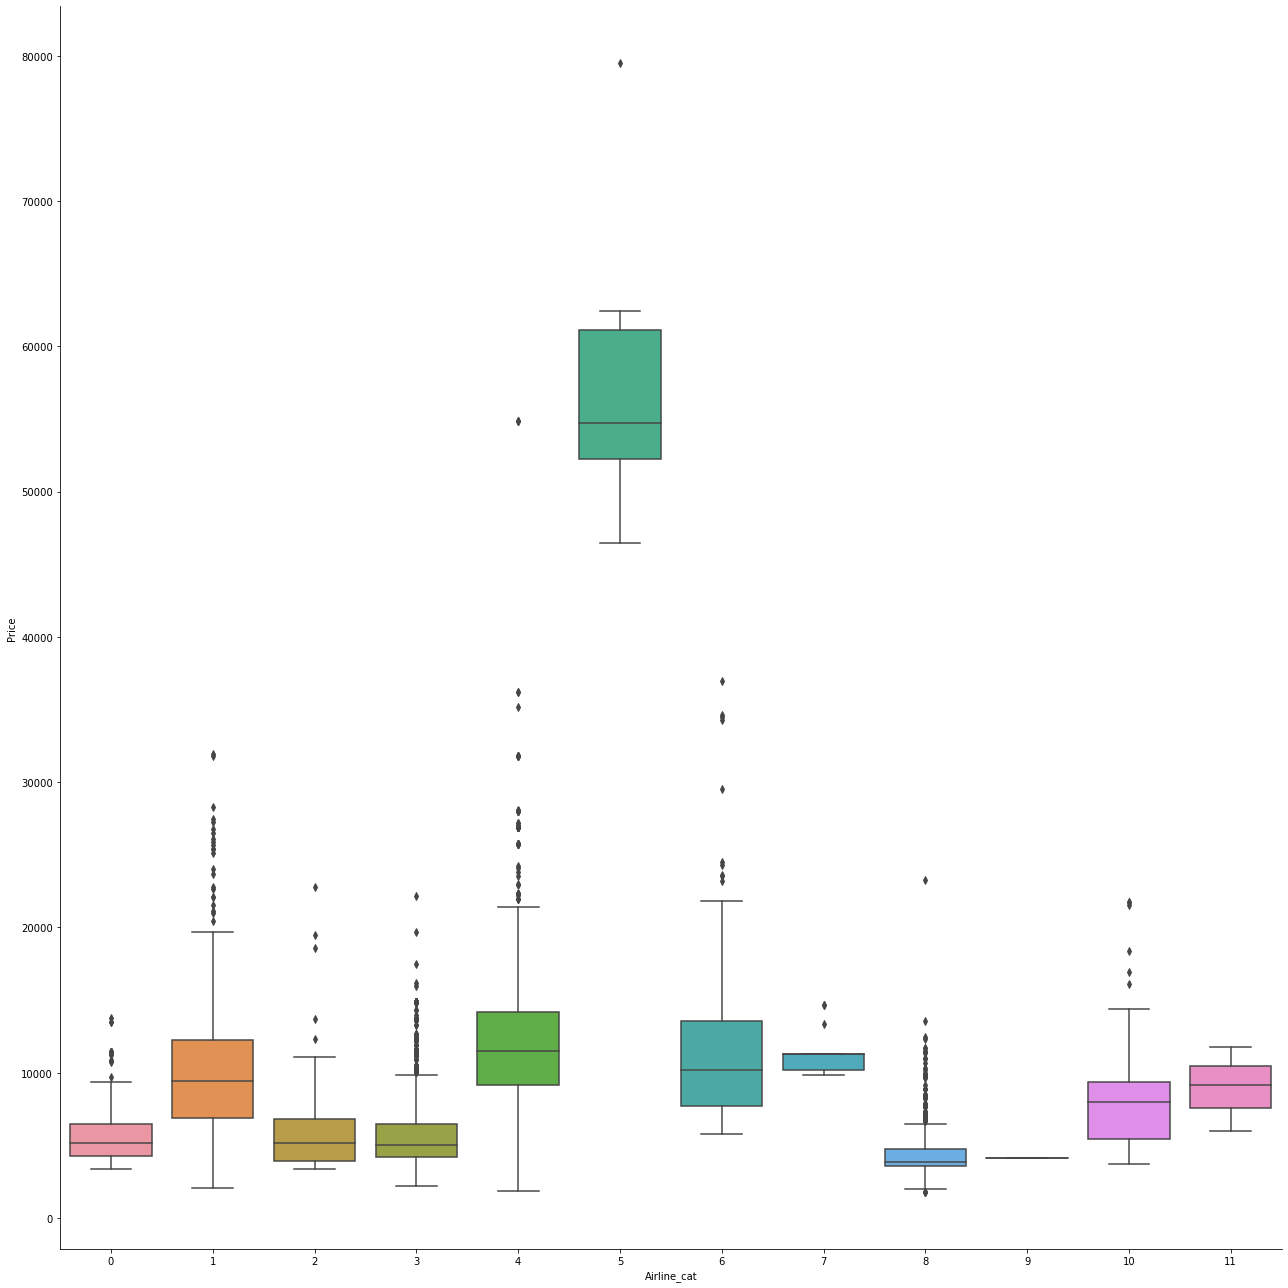

In [66]:
sns.catplot(x="Airline_cat", y="Price", kind="box", data=train_df,size=18)

## Categorical plot of Airlines and the the number of times they flew from the following Source.

C:\Users\student\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


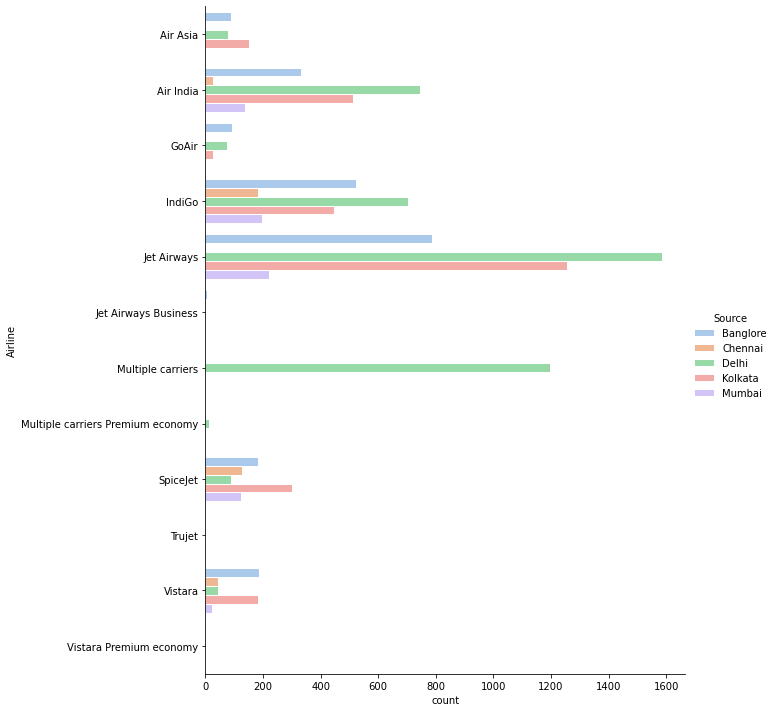

In [67]:
sns.catplot(y="Airline", hue="Source", kind="count",
            palette="pastel", edgecolor="1",
            data=train_df,size=10)

## Categorical plot of Airlines and the the number of times they flew to the following Destinations

C:\Users\student\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


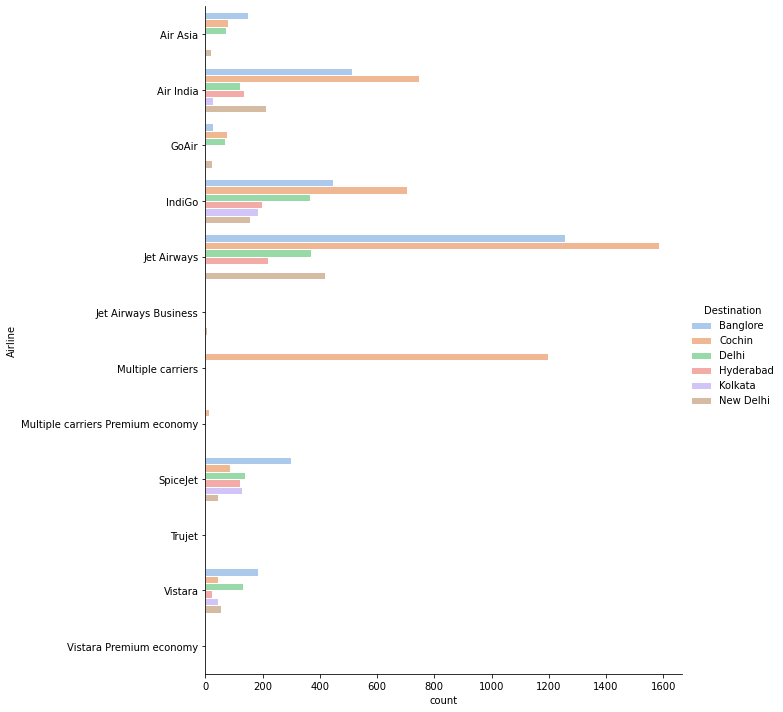

In [68]:
sns.catplot(y="Airline", hue="Destination", kind="count",
            palette="pastel", edgecolor="1",
            data=train_df,size=10)

In [69]:
del train_df["Airline"]
del train_df["Destination"]
del train_df["Source"]


## CORRELATION MATRIX

In [70]:
df=pd.get_dummies(train_df,drop_first=True)

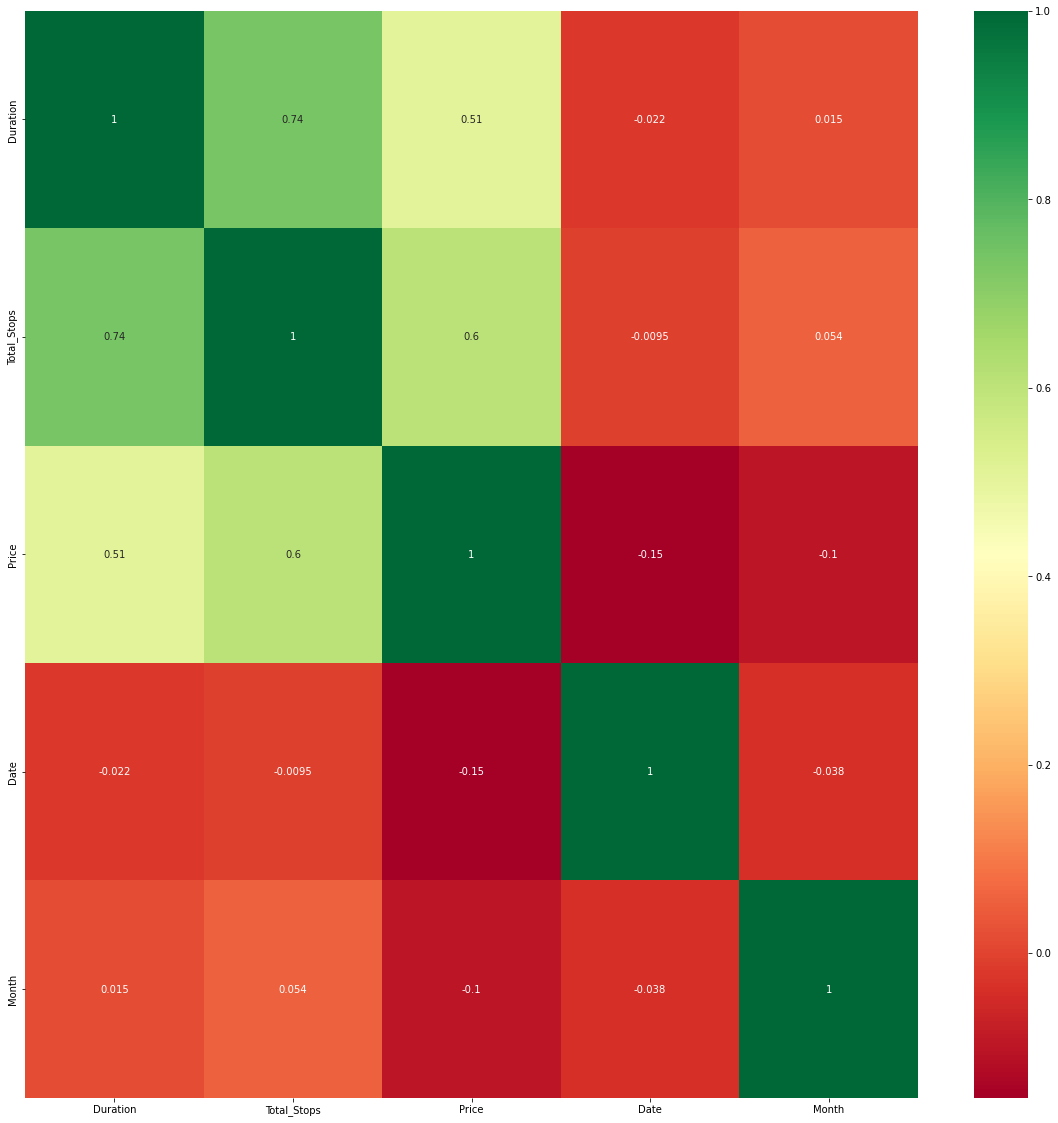

In [71]:

#get correlations of each features in dataset
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Feature Importance

In [72]:
X_mult=df.drop('Price',axis=1)

y_mult=df['Price']


In [73]:


from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_mult,y_mult)

ExtraTreesRegressor()

In [74]:
print(model.feature_importances_)

[1.92786160e-01 2.47133630e-01 1.43497892e-01 5.59023376e-02
 1.10626095e-02 1.91108364e-03 1.48818948e-02 1.48469999e-01
 6.94528500e-02 2.06648719e-02 8.58107157e-04 3.12864611e-03
 1.26682646e-04 5.96810248e-03 9.69503416e-05 3.76890708e-04
 1.47851745e-02 3.00328509e-03 6.65193111e-03 1.07332656e-02
 1.59680022e-02 6.86864969e-03 3.94891978e-04 2.52760926e-02]


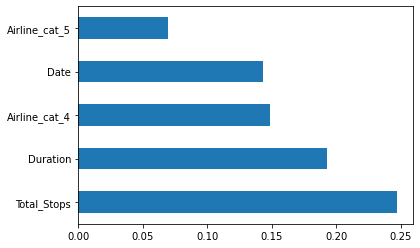

In [75]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_mult.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Fitting of Model

## Spliting data into training and test data

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X_mult,y_mult,test_size=0.2,random_state=0)


In [77]:
X_train


,Duration,Total_Stops,Date,Month,Airline_cat_1,Airline_cat_2,Airline_cat_3,Airline_cat_4,Airline_cat_5,Airline_cat_6,...,Airline_cat_11,Source_cat_1,Source_cat_2,Source_cat_3,Source_cat_4,Destination_cat_1,Destination_cat_2,Destination_cat_3,Destination_cat_4,Destination_cat_5
508,1350,1,21,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3071,470,1,24,3,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2036,695,1,6,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
49,1195,2,27,6,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
9686,155,0,27,5,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,165,0,3,6,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4859,1275,2,9,6,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3264,1225,1,3,3,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
9846,495,2,3,3,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


## Linear mutiple regression

In [78]:
lm_a=LinearRegression()
lm_a.fit(X_train,y_train)
y_test_a=lm_a.predict(X_test)
y_train_a=lm_a.predict(X_train)
from sklearn.metrics import r2_score

r2_score(y_train,y_train_a)

0.6310564662593354

In [79]:
r2_score(y_test,y_test_a)

0.5883146234529986

## RIDGE REGRESSION

In [80]:
scaler=preprocessing.StandardScaler().fit(X_train)

X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)
from sklearn.linear_model import Ridge
lm_r=Ridge(alpha=0.5)
lm_r.fit(X_train_s,y_train)
y_train_rg=lm_r.predict(X_train_s)
r2_score(y_train,y_train_rg)


0.631056447268772

In [81]:
r2_score(y_test,lm_r.predict(X_test_s))

0.5883152025612324

## RANDOM FOREST

In [82]:
rf = RandomForestRegressor()


In [83]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [84]:
## Cross Validation

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
rf.fit(X_train, y_train) 

RandomForestRegressor()

In [87]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [88]:
display(rf.score(X_test,y_test))

0.7617727285469326

In [89]:
display(rf.score(X_train,y_train))

0.9333952632710126

## cross validation

In [90]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [92]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [93]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [97]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [98]:
y_test_predcv=rf_random.predict(X_test)

## R square of our test data using Cross validation

In [99]:
display(rf.score(X_test,y_test_predcv))

0.9644549644237752

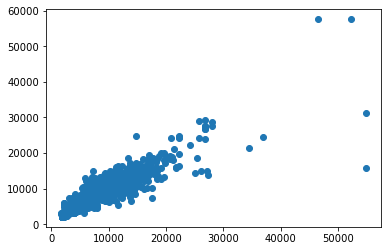

In [100]:
plt.scatter(y_test,y_test_predcv)

C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

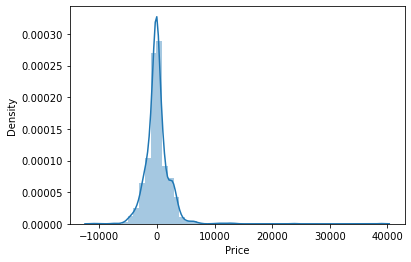

In [101]:
## plot of error terms
sns.distplot(y_test-y_test_predcv)

In [102]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predcv))
print('MSE of random forest:', metrics.mean_squared_error(y_test, y_test_predcv))
print('MSE of logistic regression:', metrics.mean_squared_error(y_test, y_test_a))
print('MSE of ridge regression:', metrics.mean_squared_error(y_test, lm_r.predict(X_test_s)))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predcv)))

MAE: 1329.850373754644
MSE of random forest: 4671134.614449239
MSE of logistic regression: 9659446.021873666
MSE of ridge regression: 9659432.434155852
RMSE: 2161.280781029906


In [103]:
pickle.dump(rf_random,open('model.pkl','wb'))

In [104]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
